In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook


In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

import reachability as re


In [3]:
savefigures = False
savepath = 'tmp/'

In [4]:
item_factors = [ [0.2, 1], [1, 0.1],  [-0.1, -0.5], 
                 [-0.5, -0.75], [-0.1, 0.5]]
Q = np.array(item_factors)


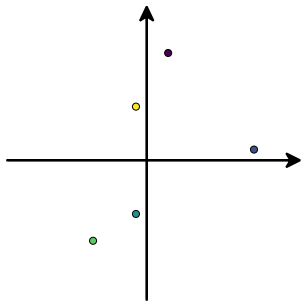

In [5]:
# colors the regions by the top-(X+1) pick
color_region_by = 0

re.plot_latent_space(Q.T, [], nonnegative=False, 
    color_by_top=color_region_by, colorbar=False, figsize=(5,5), title=None)

if savefigures: plt.savefig(savepath+'items.pdf', bbox_inches = 'tight',)

In [6]:
%%time
leaves = re.get_top_n_regions(Q.T, 1, unit=1.2,  nonnegative=False) 
all_recs = [leaf.get_rec_list() for leaf in leaves]
print(len(np.unique(all_recs)))

4
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 16.6 ms


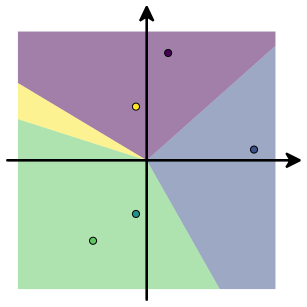

In [8]:
# colors the regions by the top-(X+1) pick
color_region_by = 0

re.plot_latent_space(Q.T, leaves, nonnegative=False, 
    color_by_top=color_region_by, colorbar=False, figsize=(5,5), title=None)

if savefigures: plt.savefig(savepath+'item_region.pdf', bbox_inches = 'tight',)

In [9]:
mutable = [3]
immutable = [1]
total = mutable+immutable
unseen = [i for i in range(len(item_factors)) if i not in total]
rating = [-0.5]

W = np.linalg.inv( Q[total].T.dot(Q[total]) ) #+ 0.001*np.eye(2)
B = W.dot(Q[mutable].T)

v0 = W.dot(Q[immutable].T.dot(rating)).reshape(-1,1)+0.02

a_full = np.linspace(-0.5,1,20).reshape(1,-1)
a_bounded = np.linspace(-0.35,0.35,20).reshape(1,-1)
a_int = np.linspace(-0.35,0.35,3).reshape(1,-1)

p_full = B.dot(a_full) + v0
p_bounded = B.dot(a_bounded) + v0
p_int = B.dot(a_int) + v0


In [10]:
%%time
Qcheck = np.zeros_like(Q)
Qcheck[unseen] = Q[unseen]
leaves = re.get_top_n_regions(Qcheck.T, 1, unit=1.2,  nonnegative=False) 
all_recs = [leaf.get_rec_list() for leaf in leaves]
print(len(np.unique(all_recs)))

5
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.5 ms


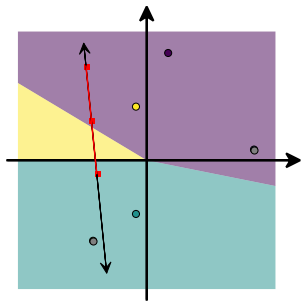

In [11]:
# colors the regions by the top-(X+1) pick
color_region_by = 0

ax = re.plot_latent_space(Q.T, leaves, nonnegative=False, 
    color_by_top=color_region_by, colorbar=False, figsize=(5,5), title=None)
for i in total:
    plt.scatter(item_factors[i][0], item_factors[i][1], edgecolors='black', marker='o', s=50, color='grey')


ax.arrow(p_full[0,0], p_full[1,0], p_full[0,-1]-p_full[0,0], p_full[1,-1]-p_full[1,0], fc='k', ec='k', lw = 1, 
                 head_width=0.1, head_length=0.1, overhang = 0.5, 
                 length_includes_head=True, clip_on = False) 
ax.arrow(p_full[0,-1], p_full[1,-1], p_full[0,0]-p_full[0,-1], p_full[1,0]-p_full[1,-1], fc='k', ec='k', lw = 1, 
                 head_width=0.1, head_length=0.1, overhang = 0.5, 
                 length_includes_head=True, clip_on = False) 

plt.plot(p_bounded[0], p_bounded[1], color='red')
plt.scatter(p_int[0], p_int[1], color='red', marker='s', s=25)

if savefigures: plt.savefig(savepath+'user_constraints.pdf', bbox_inches = 'tight',)